# Misure di rischio
Basato su: [Paolo Coletti, Misure di rischio per investimenti](https://www.youtube.com/watch?v=cBKVs6CfjZU&pp=ygUWY29sZXR0aSBtaXN1cmUgcmlzY2hpbw%3D%3D).

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("whitegrid")
# sns.set_theme()
matplotlib.rcParams['figure.figsize'] = [9.0/2, 5.0/2]

## Rendimenti mensili

In [2]:
n = 5000
rm_df = pd.DataFrame()
np.random.seed(1032039)

### Testa croce

In [3]:
rm_df["testa croce"] = np.sign(np.random.rand(n) - 0.5)
rm_df.head()    

,testa croce
0,1.0
1,1.0
2,-1.0
3,-1.0
4,1.0


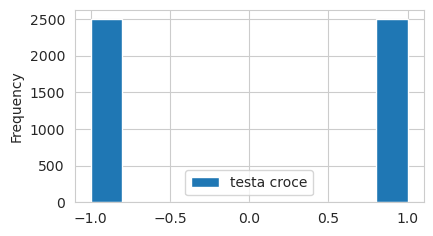

In [4]:
rm_df.plot(y="testa croce", kind="hist");

### Roulette


In [5]:
numbers = np.random.randint(0, 36, size=(n, ))

rm_df["roulette"] = np.full((n, ), -1)
rm_df.loc[numbers == 1, "roulette"] = 36
rm_df.head()

,testa croce,roulette
0,1.0,-1
1,1.0,-1
2,-1.0,-1
3,-1.0,-1
4,1.0,-1


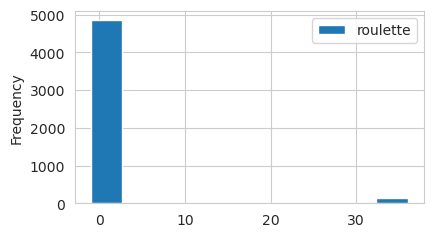

In [6]:
rm_df.plot(y="roulette", kind="hist");

### Turista per sempre

In [7]:
turista_df = pd.read_csv("dati/turista_per_sempre.csv")
turista_df.head()

,vincita,qt,1_qt,prob,prob cum
0,1936849.0,12.0,4.560000e+06,2.192982e-07,2.192982e-07
1,50000.0,24.0,2.280000e+06,4.385965e-07,6.578947e-07
2,10000.0,96.0,5.700000e+05,1.754386e-06,2.412281e-06
3,5000.0,204.0,2.682353e+05,3.728070e-06,6.140351e-06
4,1000.0,3648.0,1.500000e+04,6.666667e-05,7.280702e-05


In [8]:
costo = 5
idx = np.random.choice(turista_df.index, size=(n, ), p=turista_df.prob)
rm_df["turista"] = (turista_df.vincita.loc[idx].to_numpy() / costo) - 1
rm_df.head()

,testa croce,roulette,turista
0,1.0,-1,-1.0
1,1.0,-1,-1.0
2,-1.0,-1,-1.0
3,-1.0,-1,-1.0
4,1.0,-1,-1.0


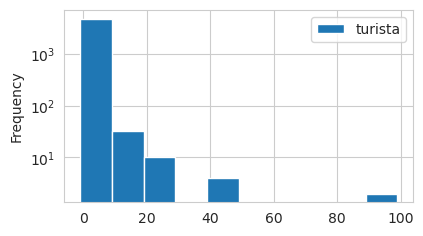

In [9]:
rm_df.plot(y="turista", kind="hist", logy=True);

### Turista per sempre x 1000

In [10]:
n_giocate = 1000
costo = 5
idx = np.random.choice(turista_df.index, size=(n*n_giocate, ), p=turista_df.prob)
vincita_singola = turista_df.vincita.loc[idx].to_numpy()
vincita = vincita_singola.reshape((n, n_giocate)).sum(axis=1)
rm_df["turista x1000"] = vincita / (costo * n_giocate) - 1
rm_df.head()

,testa croce,roulette,turista,turista x1000
0,1.0,-1,-1.0,-0.392
1,1.0,-1,-1.0,-0.466
2,-1.0,-1,-1.0,-0.484
3,-1.0,-1,-1.0,-0.461
4,1.0,-1,-1.0,-0.331


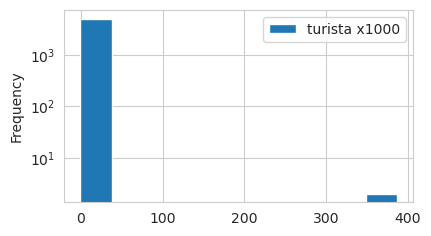

In [11]:
rm_df.plot(y="turista x1000", kind="hist", logy=True);

## Statistiche

In [12]:
rm_df.describe()

,testa croce,roulette,turista,turista x1000
count,5000.0000,5000.000000,5000.000000,5000.000000
mean,0.0004,0.050800,-0.361200,-0.199837
std,1.0001,6.146786,2.702627,7.752007
min,-1.0000,-1.000000,-1.000000,-0.609000
25%,-1.0000,-1.000000,-1.000000,-0.428000
50%,1.0000,-1.000000,-1.000000,-0.383000
75%,1.0000,-1.000000,0.000000,-0.328000
max,1.0000,36.000000,99.000000,387.018800


<Axes: >

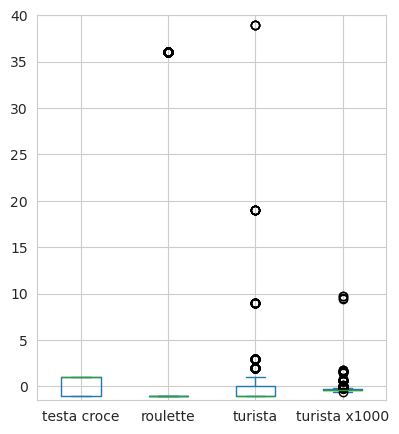

In [13]:
rm_df.plot(kind="box", figsize=(4.5, 5.0), ylim=(-1.5, 40))

### Indice di Sharpe

In [14]:
sharpe = rm_df.mean() / rm_df.std()
sharpe

testa croce      0.000400
roulette         0.008264
turista         -0.133648
turista x1000   -0.025779
dtype: float64

### VaR
Value at Risk

È il 5-percetile della distribuzione.

In [15]:
var = rm_df.quantile(0.05)
var

testa croce     -1.000
roulette        -1.000
turista         -1.000
turista x1000   -0.483
Name: 0.05, dtype: float64

### CVaR
Conditional Value at Risk

Media dei casi sotto il 5 percentile

In [16]:
cvar = rm_df[rm_df <= var].mean()
cvar

testa croce     -1.000000
roulette        -1.000000
turista         -1.000000
turista x1000   -0.504176
dtype: float64

### Max drawdown
Perdita dal massimo valore raggiunto durante l'investimento.